# Project Report: Predicting Flood Probability

# 1. Introduction:
Floods pose significant risks to communities, infrastructure, and the environment. Predicting flood probability is crucial for effective disaster management and mitigation strategies. This project aims to develop machine learning models to predict flood probability based on various factors.

# 2. Data Description:
The dataset consists of 1,117,957 records and 22 columns, including features such as Monsoon Intensity, Topography Drainage, River Management, Deforestation, Urbanization, Climate Change, Dams Quality, and others.
The target variable is Flood Probability, representing the likelihood of floods occurring in a specific area.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import binom
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
train_data=pd.read_csv('flood_train.csv')

In [3]:
train_data.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [4]:
train_data.tail()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
1117952,1117952,3,3,4,10,4,5,5,7,10,...,7,8,7,2,2,1,4,6,4,0.495
1117953,1117953,2,2,4,3,9,5,8,1,3,...,9,4,4,3,7,4,9,4,5,0.480
1117954,1117954,7,3,9,4,6,5,9,1,3,...,5,5,5,5,6,5,5,2,4,0.485
1117955,1117955,7,3,3,7,5,2,3,4,6,...,6,8,5,3,4,6,7,6,4,0.495
1117956,1117956,4,5,6,9,5,5,2,8,4,...,4,8,6,5,5,6,7,7,8,0.560


In [5]:
train_data.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [7]:
train_data.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

# 3. Data Preprocessing:
Checked for missing values: No missing values found.
Checked for duplicates: No duplicate records found.
Data types: All features are numeric (integer or float), suitable for modeling.
Correlation Analysis: Examined correlations between features and the target variable using a correlation matrix and heatmap visualization.

In [8]:
train_data.isnull().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [9]:
train_data.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0          False
1          False
2          False
3          False
4          False
           ...  
1117952    False
1117953    False
1117954    False
1117955    False
1117956    False
Length: 1117957, dtype: bool>

In [10]:
train_data.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0          False
1          False
2          False
3          False
4          False
           ...  
1117952    False
1117953    False
1117954    False
1117955    False
1117956    False
Length: 1117957, dtype: bool>

In [11]:
train_data.drop(columns=['id']).corr()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
MonsoonIntensity,1.000000,-0.007362,-0.008070,-0.007251,-0.009309,-0.008031,-0.007787,-0.007836,-0.008232,-0.010309,...,-0.009716,-0.010659,-0.009121,-0.008900,-0.008486,-0.008679,-0.006811,-0.008155,-0.008474,0.189098
TopographyDrainage,-0.007362,1.000000,-0.009924,-0.008548,-0.010532,-0.009619,-0.007607,-0.009824,-0.009496,-0.012887,...,-0.010056,-0.012526,-0.010240,-0.011067,-0.006628,-0.010815,-0.010267,-0.011617,-0.012350,0.187635
RiverManagement,-0.008070,-0.009924,1.000000,-0.008574,-0.012292,-0.009237,-0.008711,-0.010058,-0.010783,-0.011615,...,-0.011277,-0.011680,-0.008994,-0.011412,-0.005827,-0.006727,-0.010069,-0.009673,-0.011550,0.187131
Deforestation,-0.007251,-0.008548,-0.008574,1.000000,-0.012248,-0.008266,-0.009356,-0.011536,-0.010039,-0.013175,...,-0.010490,-0.012388,-0.009257,-0.010671,-0.008862,-0.011777,-0.011004,-0.010424,-0.009661,0.184001
Urbanization,-0.009309,-0.010532,-0.012292,-0.012248,1.000000,-0.011199,-0.011128,-0.010153,-0.010559,-0.010784,...,-0.012572,-0.014497,-0.010582,-0.012107,-0.010656,-0.011485,-0.011023,-0.011584,-0.013005,0.180861
ClimateChange,-0.008031,-0.009619,-0.009237,-0.008266,-0.011199,1.000000,-0.008427,-0.009457,-0.011517,-0.012533,...,-0.009650,-0.013005,-0.009352,-0.009882,-0.006324,-0.010332,-0.009376,-0.010772,-0.011379,0.184761
DamsQuality,-0.007787,-0.007607,-0.008711,-0.009356,-0.011128,-0.008427,1.000000,-0.009401,-0.009033,-0.010890,...,-0.010439,-0.012096,-0.009924,-0.009085,-0.009831,-0.009599,-0.009372,-0.011374,-0.013081,0.187996
Siltation,-0.007836,-0.009824,-0.010058,-0.011536,-0.010153,-0.009457,-0.009401,1.000000,-0.010179,-0.010628,...,-0.010702,-0.011762,-0.009173,-0.009457,-0.006312,-0.008739,-0.008667,-0.009079,-0.008493,0.186789
AgriculturalPractices,-0.008232,-0.009496,-0.010783,-0.010039,-0.010559,-0.011517,-0.009033,-0.010179,1.000000,-0.012244,...,-0.010845,-0.011415,-0.010624,-0.009901,-0.008708,-0.008958,-0.011392,-0.010418,-0.011157,0.183366
Encroachments,-0.010309,-0.012887,-0.011615,-0.013175,-0.010784,-0.012533,-0.010890,-0.010628,-0.012244,1.000000,...,-0.011994,-0.016203,-0.011299,-0.013542,-0.010404,-0.010645,-0.010364,-0.012175,-0.011860,0.178841


In [12]:
test_data=pd.read_csv('flood_test.csv')

In [13]:
test_data.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5


In [14]:
test_data.tail()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
745300,1863257,5,4,8,3,5,4,4,5,5,...,5,6,1,3,5,6,4,4,6,6
745301,1863258,4,4,2,12,4,3,4,3,5,...,3,7,4,4,3,5,5,3,5,4
745302,1863259,5,7,9,5,5,6,7,5,5,...,6,11,3,11,4,5,9,5,5,4
745303,1863260,4,7,6,3,5,2,3,8,6,...,6,6,8,6,2,3,8,7,5,5
745304,1863261,4,2,5,3,8,4,5,3,5,...,4,2,6,10,4,3,9,8,6,3


In [15]:
test_data.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
count,7.453050e+05,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,...,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000
mean,1.490609e+06,4.915610,4.930288,4.960027,4.946084,4.938424,4.933524,4.958468,4.927651,4.945308,...,4.947436,4.944003,4.957209,4.927620,4.930720,4.926062,4.926957,4.948424,4.940204,4.943918
std,2.151512e+05,2.056295,2.094117,2.071722,2.052602,2.081816,2.059243,2.089312,2.068110,2.073404,...,2.081322,2.072335,2.088787,2.079006,2.083348,2.065638,2.073692,2.065891,2.079128,2.087387
min,1.117957e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.304283e+06,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,...,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000
50%,1.490609e+06,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,1.676935e+06,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
max,1.863261e+06,16.000000,17.000000,16.000000,17.000000,17.000000,17.000000,16.000000,16.000000,16.000000,...,16.000000,17.000000,17.000000,16.000000,16.000000,17.000000,19.000000,22.000000,16.000000,16.000000


In [16]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745305 entries, 0 to 745304
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   id                               745305 non-null  int64
 1   MonsoonIntensity                 745305 non-null  int64
 2   TopographyDrainage               745305 non-null  int64
 3   RiverManagement                  745305 non-null  int64
 4   Deforestation                    745305 non-null  int64
 5   Urbanization                     745305 non-null  int64
 6   ClimateChange                    745305 non-null  int64
 7   DamsQuality                      745305 non-null  int64
 8   Siltation                        745305 non-null  int64
 9   AgriculturalPractices            745305 non-null  int64
 10  Encroachments                    745305 non-null  int64
 11  IneffectiveDisasterPreparedness  745305 non-null  int64
 12  DrainageSystems               

In [17]:
test_data.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors'],
      dtype='object')

In [18]:
test_data.isnull().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
dtype: int64

In [19]:
test_data.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
745300    False
745301    False
745302    False
745303    False
745304    False
Length: 745305, dtype: bool>

In [20]:
test_data.dtypes

id                                 int64
MonsoonIntensity                   int64
TopographyDrainage                 int64
RiverManagement                    int64
Deforestation                      int64
Urbanization                       int64
ClimateChange                      int64
DamsQuality                        int64
Siltation                          int64
AgriculturalPractices              int64
Encroachments                      int64
IneffectiveDisasterPreparedness    int64
DrainageSystems                    int64
CoastalVulnerability               int64
Landslides                         int64
Watersheds                         int64
DeterioratingInfrastructure        int64
PopulationScore                    int64
WetlandLoss                        int64
InadequatePlanning                 int64
PoliticalFactors                   int64
dtype: object

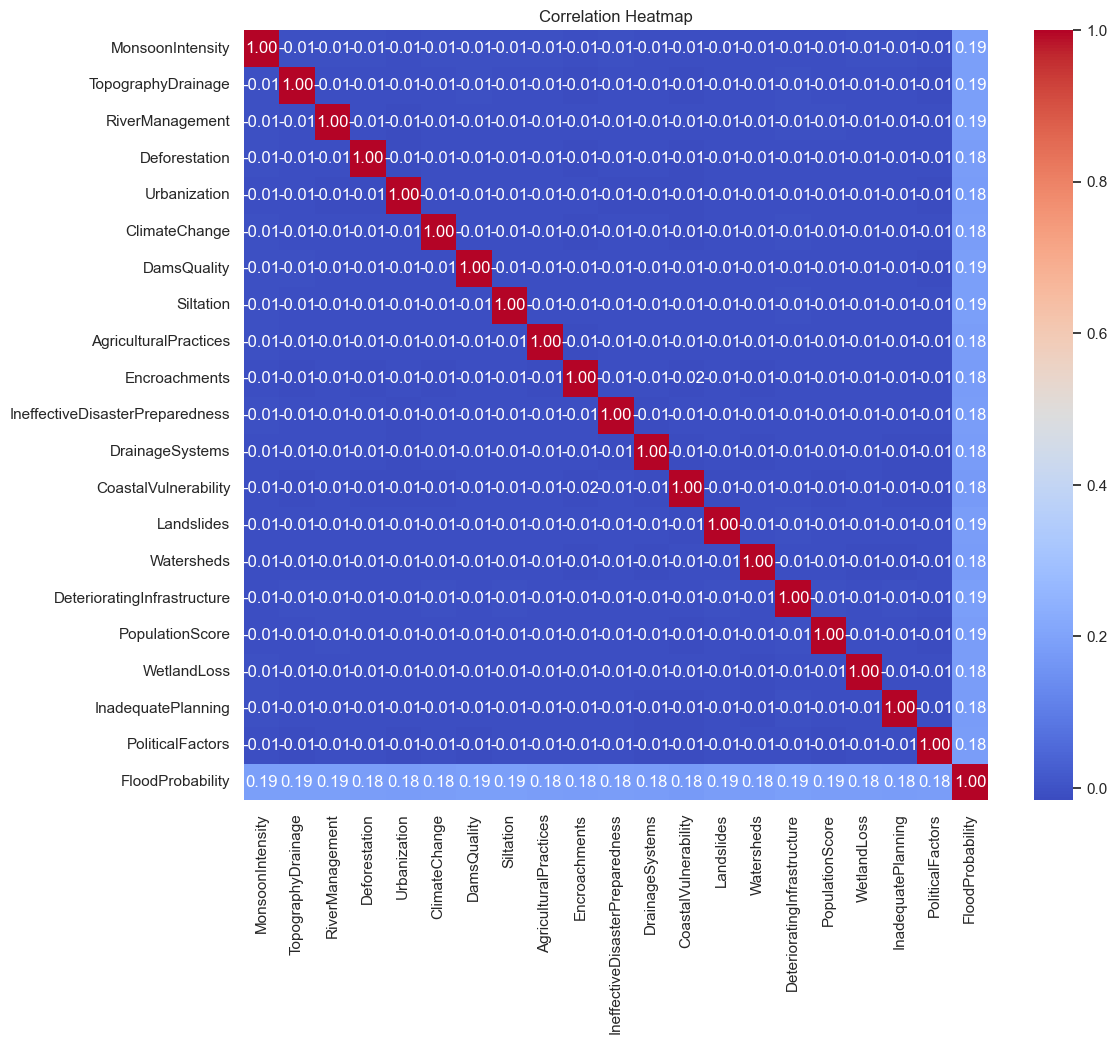

In [21]:
# Calculate the correlation matrix
correlation_matrix = train_data.drop(columns=['id']).corr()
# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# 4. Exploratory Data Analysis:
1. Boxplots were generated to visualize the distribution of each feature.
2. Identified potential outliers and anomalies in the data.

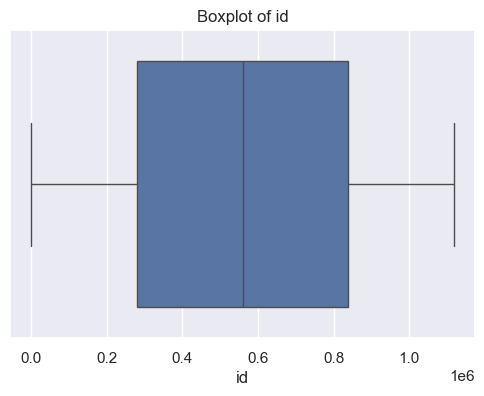

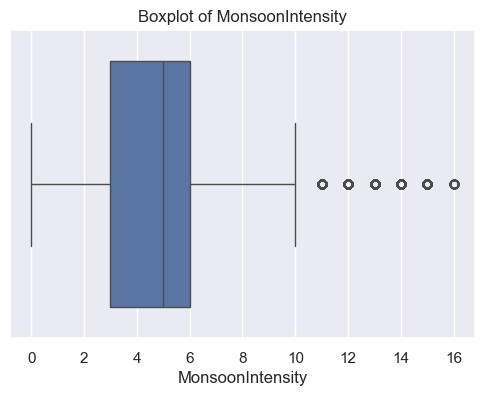

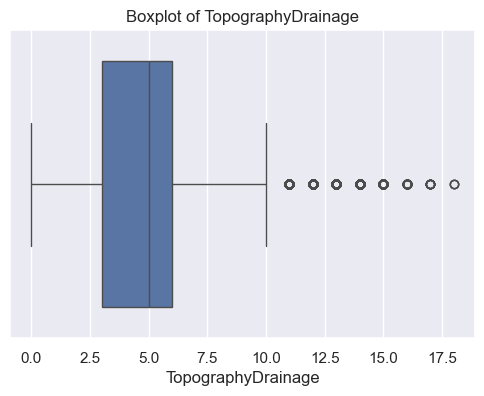

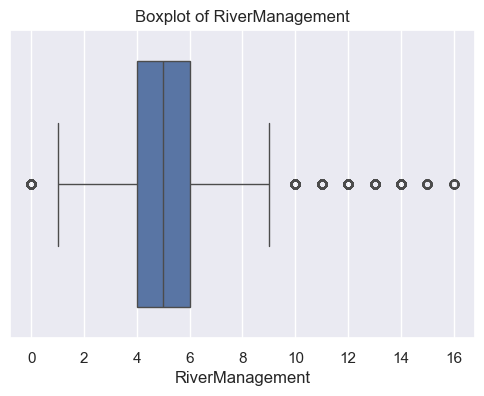

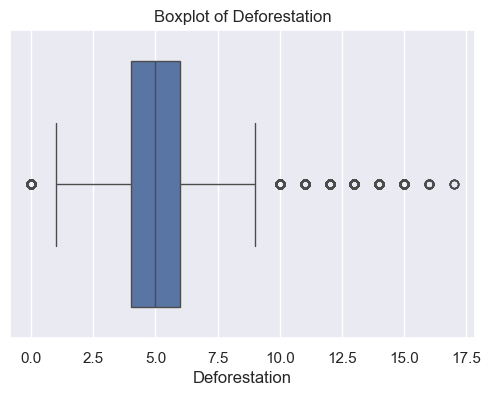

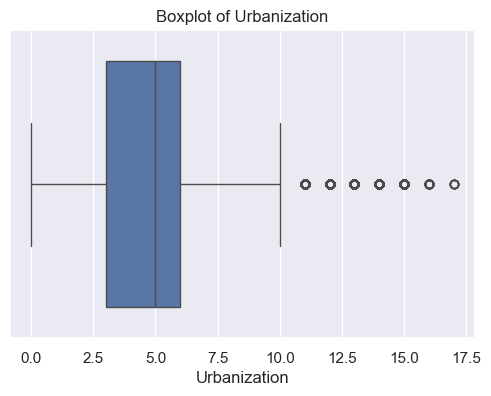

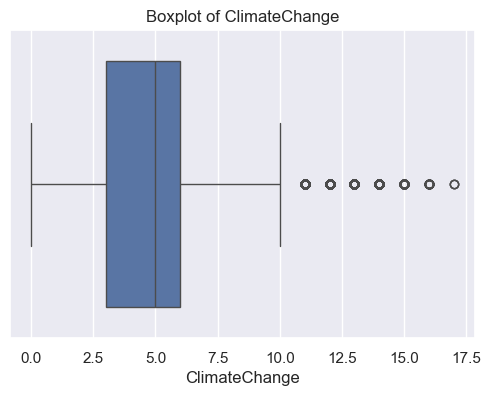

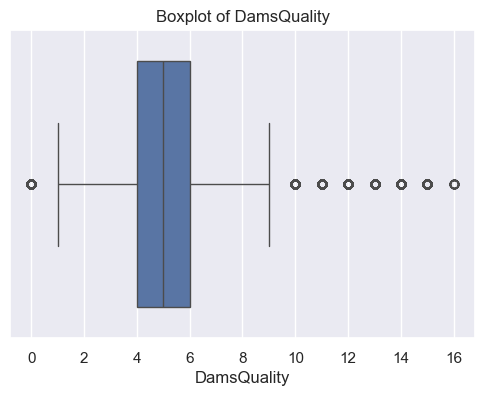

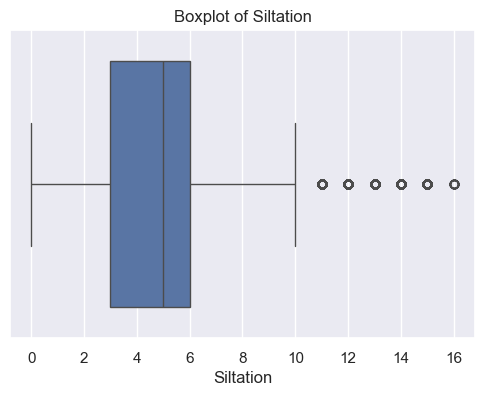

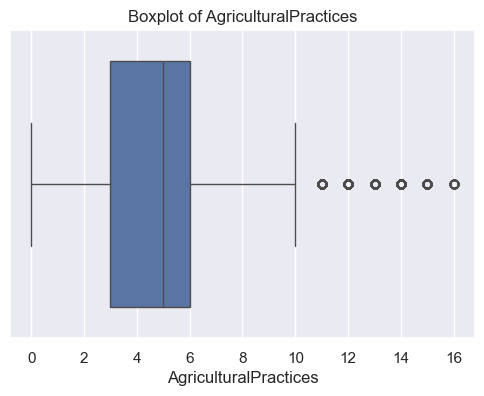

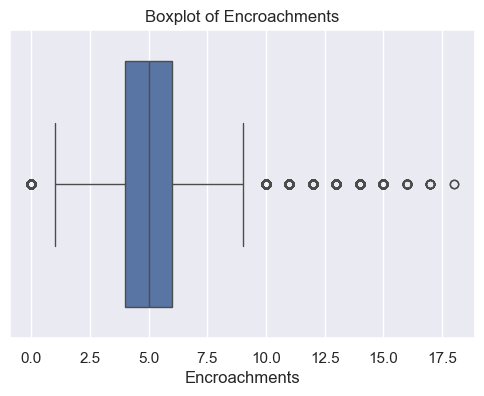

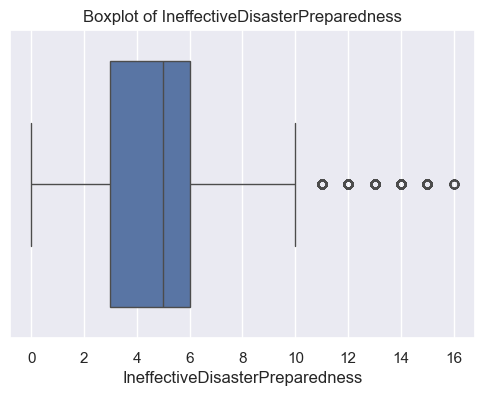

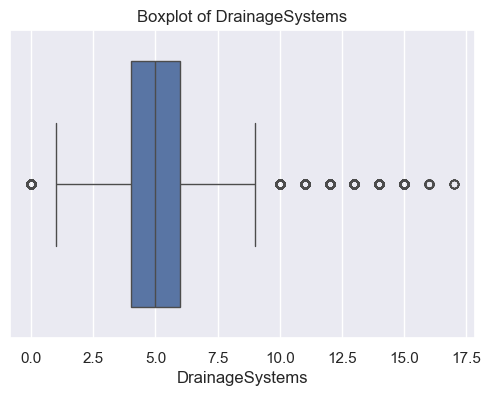

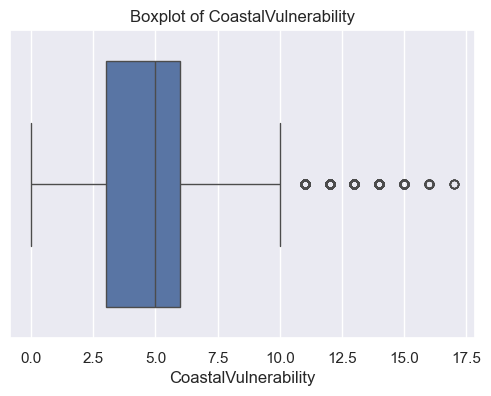

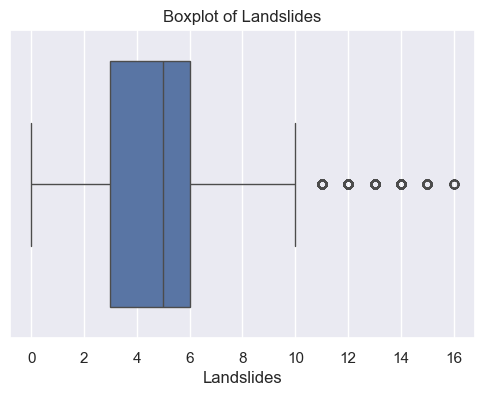

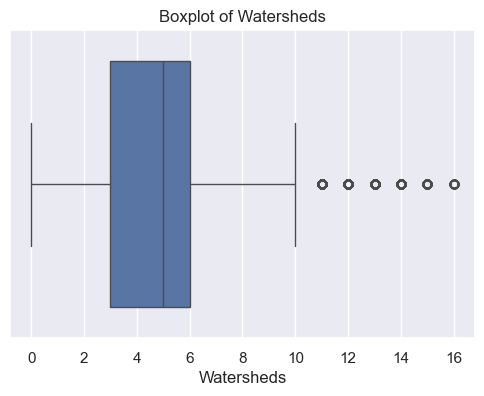

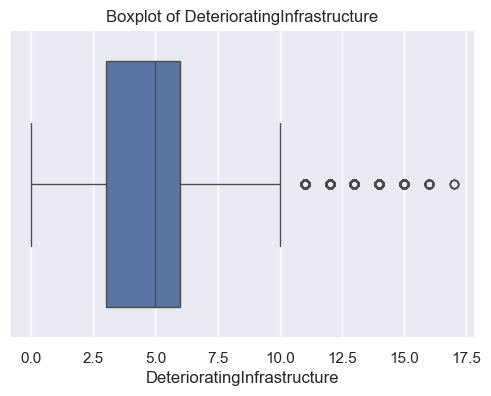

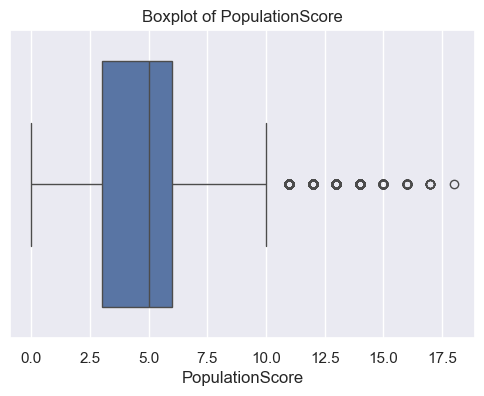

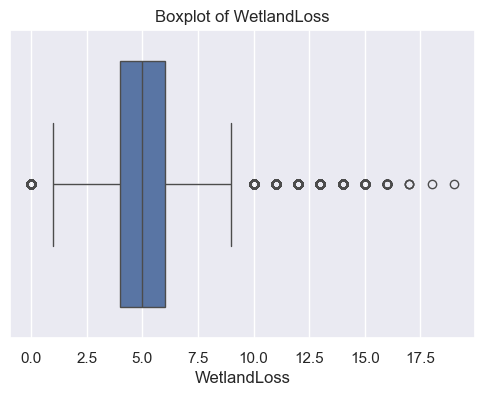

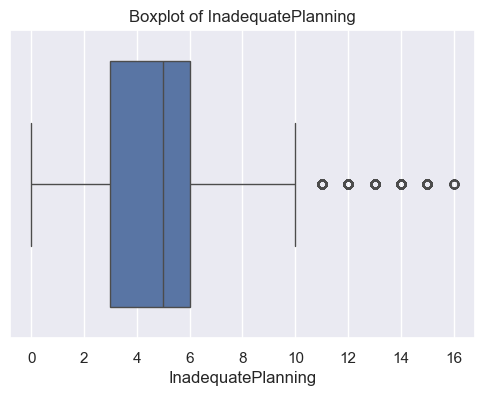

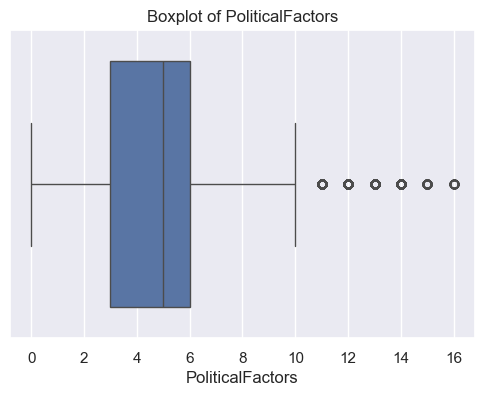

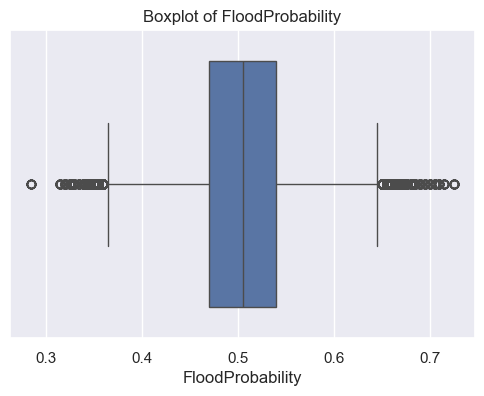

In [22]:
# Loop through each column and create a boxplot
for col in train_data.columns:
    plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
    sns.boxplot(x=train_data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

# 5. Model Building:
1. Split the data into training and testing sets (80-20 split).
2. Developed four machine learning models:
3. Decision Tree Regression
4. Linear Regression
5. XGBoost Regression
6. Ridge Regression
7. Trained each model on the training data and evaluated their performance using Mean Squared Error (MSE) and R-squared (R^2) score.

In [23]:
# Split the data into features (X) and target variable (y)
X = train_data.drop(columns=['FloodProbability','id'])
y = train_data['FloodProbability']

Mean Squared Error: 0.002451642388815342
R^2 Score: 0.05679790457739231


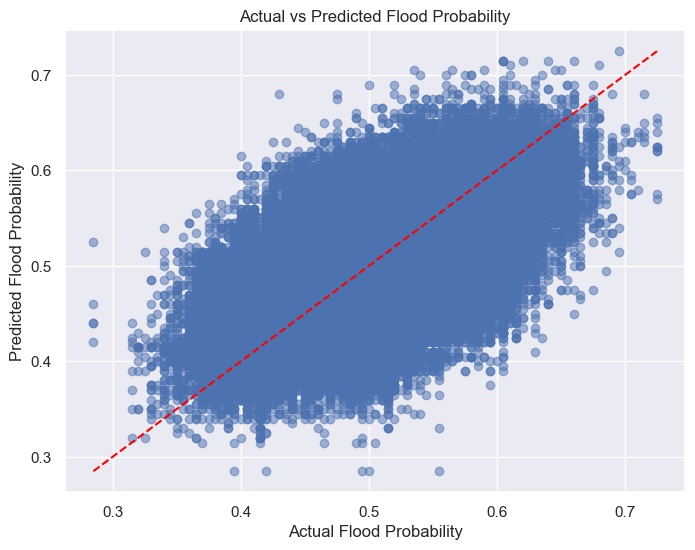

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the decision tree regressor model
decision_tree = DecisionTreeRegressor(random_state=42)
# Fit the model to the training data
decision_tree.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = decision_tree.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add diagonal line for reference
plt.title('Actual vs Predicted Flood Probability')
plt.xlabel('Actual Flood Probability')
plt.ylabel('Predicted Flood Probability')
plt.grid(True)
plt.show()

Linear Regression Mean Squared Error: 0.00040320658709055805
Linear Regression R^2 Score: 0.8448773362840329


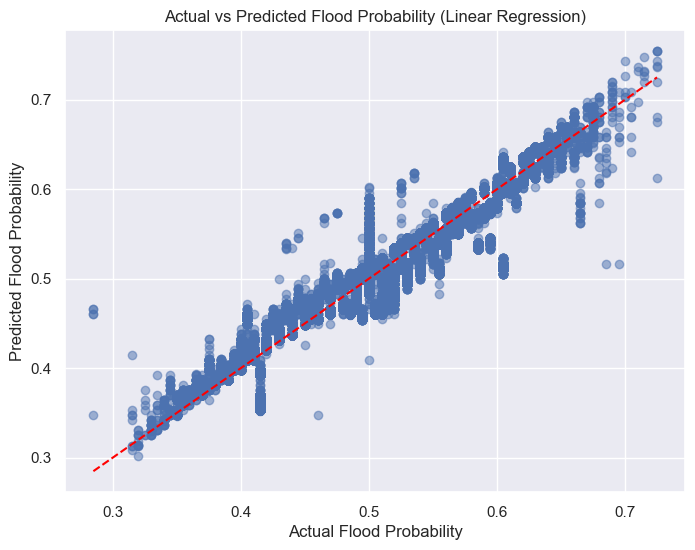

In [25]:
from sklearn.linear_model import LinearRegression
# Initialize the linear regression model
linear_reg = LinearRegression()
# Fit the model to the training data
linear_reg.fit(X_train, y_train)
# Make predictions on the testing data
y_pred_linear = linear_reg.predict(X_test)
# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f'Linear Regression Mean Squared Error: {mse_linear}')
print(f'Linear Regression R^2 Score: {r2_linear}')
# Plot actual vs predicted values for linear regression model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add diagonal line for reference
plt.title('Actual vs Predicted Flood Probability (Linear Regression)')
plt.xlabel('Actual Flood Probability')
plt.ylabel('Predicted Flood Probability')
plt.grid(True)
plt.show()

XGBoost Mean Squared Error: 0.0004962876296730619
XGBoost R^2 Score: 0.8090669608359393


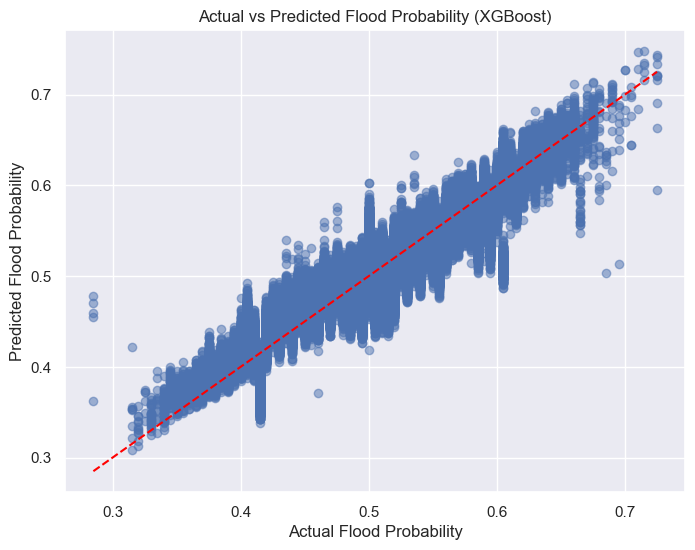

In [26]:
import xgboost as xgb
# Initialize the XGBoost regressor model
xgboost_model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
# Fit the model to the training data
xgboost_model.fit(X_train, y_train)
# Make predictions on the testing data
y_pred_xgb = xgboost_model.predict(X_test)
# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'XGBoost Mean Squared Error: {mse_xgb}')
print(f'XGBoost R^2 Score: {r2_xgb}')
# Plot actual vs predicted values for XGBoost model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add diagonal line for reference
plt.title('Actual vs Predicted Flood Probability (XGBoost)')
plt.xlabel('Actual Flood Probability')
plt.ylabel('Predicted Flood Probability')
plt.grid(True)
plt.show()

Ridge Regression Mean Squared Error: 0.0004032065870623341
Ridge Regression R^2 Score: 0.8448773362948914


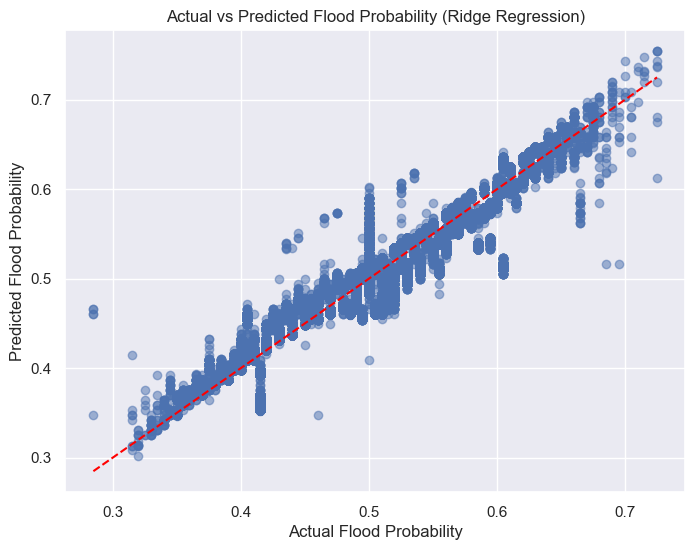

In [27]:
from sklearn.linear_model import Ridge
# Initialize the Ridge regression model
ridge_model = Ridge(alpha=0.1, random_state=42)
# Fit the model to the training data
ridge_model.fit(X_train, y_train)
# Make predictions on the testing data
y_pred_ridge = ridge_model.predict(X_test)
# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'Ridge Regression Mean Squared Error: {mse_ridge}')
print(f'Ridge Regression R^2 Score: {r2_ridge}')
# Plot actual vs predicted values for Ridge Regression model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add diagonal line for reference
plt.title('Actual vs Predicted Flood Probability (Ridge Regression)')
plt.xlabel('Actual Flood Probability')
plt.ylabel('Predicted Flood Probability')
plt.grid(True)
plt.show()

# 6. Model Evaluation:
1. Decision Tree Regression:
Mean Squared Error: 0.0025 & R^2 Score: 0.0568
2. Linear Regression:
Mean Squared Error: 0.0004 & R^2 Score: 0.8449
3. XGBoost Regression:
Mean Squared Error: 0.0005 & R^2 Score: 0.8091
4. Ridge Regression:
Mean Squared Error: 0.0004 & R^2 Score: 0.8449

In [28]:
from sklearn.linear_model import LinearRegression

# Instantiate the linear regression model
linear_reg = LinearRegression()

# Train the model
linear_reg.fit(X_train, y_train)  # Assuming X_train and y_train are your training features and target variable

# Make predictions on the test data
predictions_test = linear_reg.predict(test_data.drop(columns=['id']))

# Create a new DataFrame with 'id' and 'FloodProbabilityPrediction' columns
df_predicted = pd.DataFrame({'id': test_data['id'], 'FloodProbabilityPrediction': predictions_test})

# Display the new DataFrame with predictions
print(df_predicted)

             id  FloodProbabilityPrediction
0       1117957                    0.573613
1       1117958                    0.455271
2       1117959                    0.454752
3       1117960                    0.466179
4       1117961                    0.466085
...         ...                         ...
745300  1863257                    0.477201
745301  1863258                    0.449381
745302  1863259                    0.624313
745303  1863260                    0.550934
745304  1863261                    0.511522

[745305 rows x 2 columns]


In [29]:
df_predicted.head()

,id,FloodProbabilityPrediction
0,1117957,0.573613
1,1117958,0.455271
2,1117959,0.454752
3,1117960,0.466179
4,1117961,0.466085


In [30]:
# Export df_predicted to CSV file in Kaggle output directory
df_predicted.to_csv('predicted_flood_probability.csv', index=False)

# 7. Conclusion:
1. The Linear Regression model outperformed the other models, achieving the lowest Mean Squared Error and the highest R^2 Score.
2. The above analysis and projection have enabled us to come to the conclusion that, based on the available data there is a strong possibility of flooding in the locality.
3. The project demonstrates the potential of machine learning models in predicting flood probability based on various environmental and socio-economic factors.
4. Further refinement and optimization of the models could improve accuracy and reliability, potentially enhancing flood prediction and disaster management efforts.